# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code h

import pandas as pd 

df = pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding = 'latin1')
df_schema = pd.read_csv('schema.csv')
display(df.head())
print(df_schema)

print(df.columns)


/home/khan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=res

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                             Column  \
0                      GenderSelect   
1                    GenderFreeForm   
2                           Country   
3                               Age   
4                  EmploymentStatus   
..                              ...   
285                 JobFactorRemote   
286               JobFactorIndustry   
287       JobFactorLeaderReputation   
288              JobFactorDiversity   
289  JobFactorPublishingOpportunity   

                                              Question     Asked  
0       Select your gender identity. - Selected Choice       All  
1    Select your gender identity. - A different ide...       All  
2            Select the country you currently live in.       All  
3                                     What's your age?       All  
4               What's your current employment status?       All  
..                                                 ...       ...  
285  How are you assessing potential job opportunit...  Learne

In [2]:
print(list(df.columns))

['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus', 'LearningDataScience', 'CodeWriter', 'CareerSwitcher', 'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'PublicDatasetsSelect', 'LearningPlatformSelect', 'LearningPlatformUsefulnessArxiv', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessCollege', 'LearningPlatformUsefulnessCompany', 'LearningPlatformUsefulnessConferences', 'LearningPlatformUsefulnessFriends', 'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessNewsletters', 'LearningPlatformUsefulnessCommunities', 'LearningPlatformUsefulnessDocumentation', 'LearningPlatformUsefulnessCourses', 'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessPodcasts', 'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessTradeBook', 'LearningPlatformUsefulnessTutoring', 'LearningPlatformUsefulnessYouTube', '

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [3]:
def report1 (dataframe,n_highest_counts):
    ''' Returns a dataframe reporting on the value counts of input frame. '''
    
    master={}
        
    for column in dataframe.columns:
        
        master[column]={}
        col_dict = master[column]
        col_dict['type'] = str(dataframe[column].dtypes)
        col_dict['% empty'] = round(((len(dataframe)-dataframe[column].count())/len(dataframe))*100,2)
        col_dict['unique values'] = dataframe[column].nunique()
        
        x = 1
        series1 = dataframe[column].value_counts().head(n_highest_counts)
        series1 = round((series1/len(dataframe)) * 100, 2)        
        
        for index,item in series1.items():
            value_prop = str(x) + 'nth_value_%'
            value_name = str(x) + 'nth_value'
            col_dict[value_name] = index
            col_dict[value_prop] = item
            x += 1
        
    df_report=pd.DataFrame.from_dict(master,orient='index')
    df_report.sort_values(['1nth_value_%'],ascending=False,inplace=True)
        
    return df_report


In [4]:
#Your code here
print(df['FormalEducation'].describe())
print(df['FormalEducation'].unique())

df_masters = df[df['FormalEducation'] == "Master's degree"][['AdjustedCompensation','FormalEducation']].dropna()
df_bachelors = df[df['FormalEducation'] == "Bachelor's degree"][['AdjustedCompensation','FormalEducation']].dropna()

count               18142
unique                  7
top       Master's degree
freq                 8204
Name: FormalEducation, dtype: object
["Bachelor's degree" "Master's degree" 'Doctoral degree' nan
 "Some college/university study without earning a bachelor's degree"
 'I did not complete any formal education past high school'
 'Professional degree' 'I prefer not to answer']


In [5]:
display(df_masters)
display(df_bachelors)

,AdjustedCompensation,FormalEducation
3,250000.000,Master's degree
14,36634.400,Master's degree
27,53352.000,Master's degree
31,35419.104,Master's degree
37,80000.000,Master's degree
...,...,...
26148,54670.000,Master's degree
26159,1.000,Master's degree
26180,65770.430,Master's degree
26255,89686.950,Master's degree


,AdjustedCompensation,FormalEducation
8,64184.800,Bachelor's degree
9,20882.400,Bachelor's degree
11,1483.900,Bachelor's degree
21,20000.000,Bachelor's degree
25,10858.848,Bachelor's degree
...,...,...
26031,39050.000,Bachelor's degree
26072,31878.000,Bachelor's degree
26101,3336.000,Bachelor's degree
26185,50000.000,Bachelor's degree


In [6]:
import matplotlib.pyplot as plt
from  flatiron_stats import *

df_masters.hist(bins = 200)
plt.show()

<Figure size 640x480 with 1 Axes>

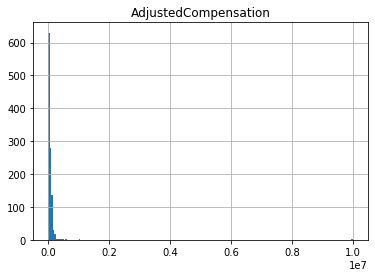

In [7]:
df_bachelors.hist(bins = 200)
plt.show()

In [8]:
p_val = p_value_welch_ttest(df_masters,df_bachelors)
print(p_val)

[0.26790611]


In [9]:
# Based off a raw t-test comparison it seels that there is not statistically signifcant difference between salaries of bachelors and mastes holders
# but lets explore further
def rm_outliers_threshold (dataframe, columns, threshold):
    '''Removes values above specified quantile threshold for all columns passed as list'''
    outliers_list = []
    for col in columns:
        outlier_indices = list(dataframe[dataframe[col] >= dataframe[col].quantile(threshold)].index)
        outliers_list = outliers_list + outlier_indices
        
    unique_set = set(outliers_list)
    outliers_list = list(unique_set)
    
    dataframe = dataframe.drop(labels=outliers_list) 
    return dataframe

In [10]:
report1(df_masters,6)
report1(df_bachelors,6)

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,4nth_value_%,5nth_value,5nth_value_%,6nth_value,6nth_value_%
FormalEducation,object,0.0,1,Bachelor's degree,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,float64,0.0,648,85000,1.45,110000.0,1.26,60000.0,1.17,100000.0,1.17,80000.0,1.08,140000.0,0.99


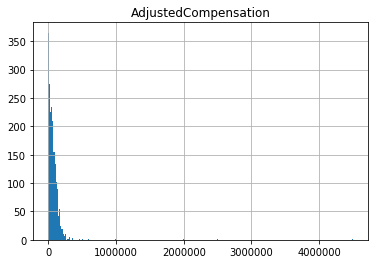

In [11]:
df_masters.hist(bins = 300)
plt.show()


In [12]:
def logarize (dataframe,columns):
    
    df = dataframe
    
    for col in columns:
        df[col] =df[col].map(lambda x: np.log(x))
    
    return df

In [13]:
print(df_masters[df_masters['AdjustedCompensation'] == 0])

       AdjustedCompensation  FormalEducation
316                     0.0  Master's degree
823                     0.0  Master's degree
1266                    0.0  Master's degree
1393                    0.0  Master's degree
1542                    0.0  Master's degree
1697                    0.0  Master's degree
1917                    0.0  Master's degree
2208                    0.0  Master's degree
3438                    0.0  Master's degree
5751                    0.0  Master's degree
5980                    0.0  Master's degree
6463                    0.0  Master's degree
7560                    0.0  Master's degree
7563                    0.0  Master's degree
16436                   0.0  Master's degree
16604                   0.0  Master's degree
21248                   0.0  Master's degree
21643                   0.0  Master's degree
22587                   0.0  Master's degree
23347                   0.0  Master's degree
24951                   0.0  Master's degree


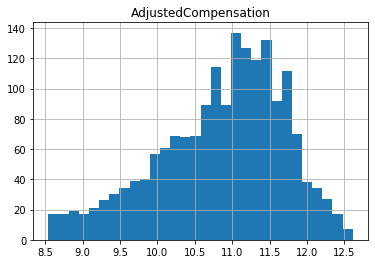

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
FormalEducation,object,0.0,1,Master's degree,100.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,float64,9.7,763,11.5129,1.36,11.695247,1.36,11.180937,1.31,10.998615,...,11.77529,1.21,11.608236,1.21,10.893255,1.06,11.407565,1.06,11.156251,1.06


In [15]:
df_masters2 = df_masters.copy()
df_masters2['AdjustedCompensation'] = df_masters2[df_masters2['AdjustedCompensation'] != 0 ]
df_masters2['AdjustedCompensation'] = df_masters2[df_masters2['AdjustedCompensation'] > 5000]
df_masters2['AdjustedCompensation'] = df_masters2['AdjustedCompensation'].map(lambda x: np.log(x))
df_masters2 = rm_outliers_threshold(df_masters2,['AdjustedCompensation'],0.995)
df_masters2.hist(bins=30)
plt.show()
report1(df_masters2,10)


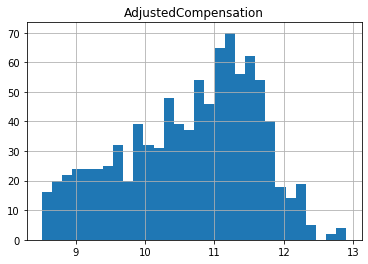

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
FormalEducation,object,0.00,1,Bachelor's degree,100.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,float64,14.52,519,11.3504,1.45,11.608236,1.27,11.0021,1.18,11.512925,...,11.407565,1.0,11.849398,1.0,10.819778,0.91,12.206073,0.91,9.838629,0.91


In [16]:
df_bachelors2 = df_bachelors.copy()
df_bachelors2['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] != 0 ]
df_bachelors2['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] >= 5000 ]
df_bachelors2['AdjustedCompensation'] = df_bachelors2['AdjustedCompensation'].map(lambda x: np.log(x))
df_bachelors2 = rm_outliers_threshold(df_bachelors2,['AdjustedCompensation'],0.995)

df_bachelors2.hist(bins=30)
plt.show()
report1(df_bachelors2,10)

In [25]:
p_val = p_value_welch_ttest(df_bachelors2['AdjustedCompensation'],df_masters2['AdjustedCompensation']  )

In [26]:
print(p_val)

1.3181419289409746e-09


In [19]:
df_bachelors3 = df_bachelors.copy()
df_bachelors3['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] != 0 ]
df_bachelors3['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] >= 5000 ]

print(df_bachelors3['AdjustedCompensation'].mean())

df_masters3 = df_masters.copy()
df_masters3['AdjustedCompensation'] = df_masters3[df_masters3['AdjustedCompensation'] != 0 ]
df_masters3['AdjustedCompensation'] = df_masters3[df_masters3['AdjustedCompensation'] > 5000]
print(df_masters3['AdjustedCompensation'].mean())


75582.9587405364
76395.59134500005


## ANALSYSIS

After culling outliers and bringing the compensations into somewhat normal distirbutions the p value has decreased dramatically, showing that there probably is a significant increase in wages associated with having a masters degree. 




## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

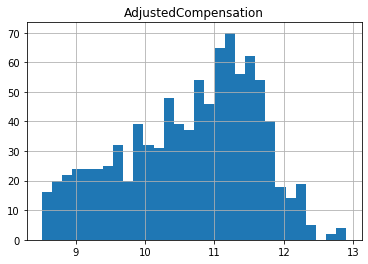

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
FormalEducation,object,0.00,1,Bachelor's degree,100.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,float64,14.52,519,11.3504,1.45,11.608236,1.27,11.0021,1.18,11.512925,...,11.407565,1.0,11.849398,1.0,10.819778,0.91,12.206073,0.91,9.838629,0.91


In [20]:
#Your code here
df_bachelors2 = df_bachelors.copy()
df_bachelors2['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] != 0 ]
df_bachelors2['AdjustedCompensation'] = df_bachelors[df_bachelors['AdjustedCompensation'] >= 5000 ]
df_bachelors2['AdjustedCompensation'] = df_bachelors2['AdjustedCompensation'].map(lambda x: np.log(x))
df_bachelors2 = rm_outliers_threshold(df_bachelors2,['AdjustedCompensation'],0.995)

df_bachelors2.hist(bins=30)
plt.show()
report1(df_bachelors2,10)




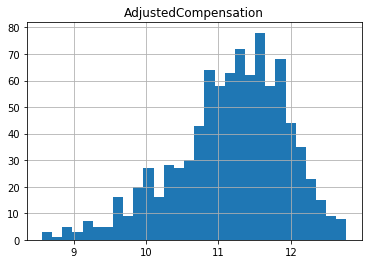

,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
FormalEducation,object,0.00,1,Doctoral degree,100.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,float64,6.24,436,11.9184,2.39,11.512925,1.77,11.695247,1.66,11.982929,...,11.849398,1.35,10.48779,1.35,11.180937,1.35,12.206073,1.35,10.819778,1.25


In [21]:

df_phd =  df[df['FormalEducation'] == 'Doctoral degree'][['AdjustedCompensation','FormalEducation']].dropna()
df_phd['AdjustedCompensation'] = df_phd[df_phd['AdjustedCompensation'] != 0 ]
df_phd['AdjustedCompensation'] = df_phd[df_phd['AdjustedCompensation'] > 5000]
df_phd['AdjustedCompensation'] = df_phd['AdjustedCompensation'].map(lambda x: np.log(x))
df_phd = rm_outliers_threshold(df_phd,['AdjustedCompensation'],0.995)
df_phd.hist(bins=30)
plt.show()
report1(df_phd,10)

In [33]:
df_phd = df[df['FormalEducation'] == 'Doctoral degree'][['AdjustedCompensation','FormalEducation']].dropna()
df_phd['AdjustedCompensation'] = df_phd[df_phd['AdjustedCompensation'] != 0 ]
df_phd['AdjustedCompensation'] = df_phd[df_phd['AdjustedCompensation'] > 5000]
print(df_phd['AdjustedCompensation'].max())
report1(df_phd,10)


28297400000.0


,type,% empty,unique values,1nth_value,1nth_value_%,2nth_value,2nth_value_%,3nth_value,3nth_value_%,4nth_value,...,6nth_value,6nth_value_%,7nth_value,7nth_value_%,8nth_value,8nth_value_%,9nth_value,9nth_value_%,10nth_value,10nth_value_%
FormalEducation,object,0.0,1,Doctoral degree,100.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdjustedCompensation,object,6.2,441,150000,2.38,100000.0,1.76,120000.0,1.65,160000.0,...,200000.0,1.34,35874.78,1.34,71749.56,1.34,140000.0,1.34,47833.04,1.24


In [24]:
p_val = p_value_welch_ttest(df_bachelors2['AdjustedCompensation'] ,df_phd['AdjustedCompensation'] )
print(p_val)

0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [34]:
#Your code here
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)


                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!